In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks 2/Terrorist Prediction/Cleaned Data.csv')
df.head()

,Unnamed: 0,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,0,1970,7,2,0,58,2,2056,22009,1,0,1,1,1,0,0,1,0,1,14,58,1907,0,13,0,0,0,0,0,0,3,0,0
1,1,1970,0,0,0,130,1,2615,13521,1,0,1,1,1,0,0,1,0,6,7,21,13,0,13,0,0,0,0,0,0,3,1,1
2,2,1970,1,0,0,160,5,1665,27244,4,0,1,1,1,0,0,1,0,1,10,217,3408,0,13,0,0,0,0,0,0,3,0,0
3,3,1970,1,0,0,78,8,935,16814,1,0,1,1,1,0,0,1,0,3,7,217,3408,0,6,0,0,0,0,0,1,3,0,0
4,4,1970,1,0,0,101,4,2644,1408,1,0,1,1,1,-9,0,1,0,7,7,217,3408,0,8,0,0,0,0,0,1,3,0,0


In [4]:
df=df.drop('Unnamed: 0',axis=1)

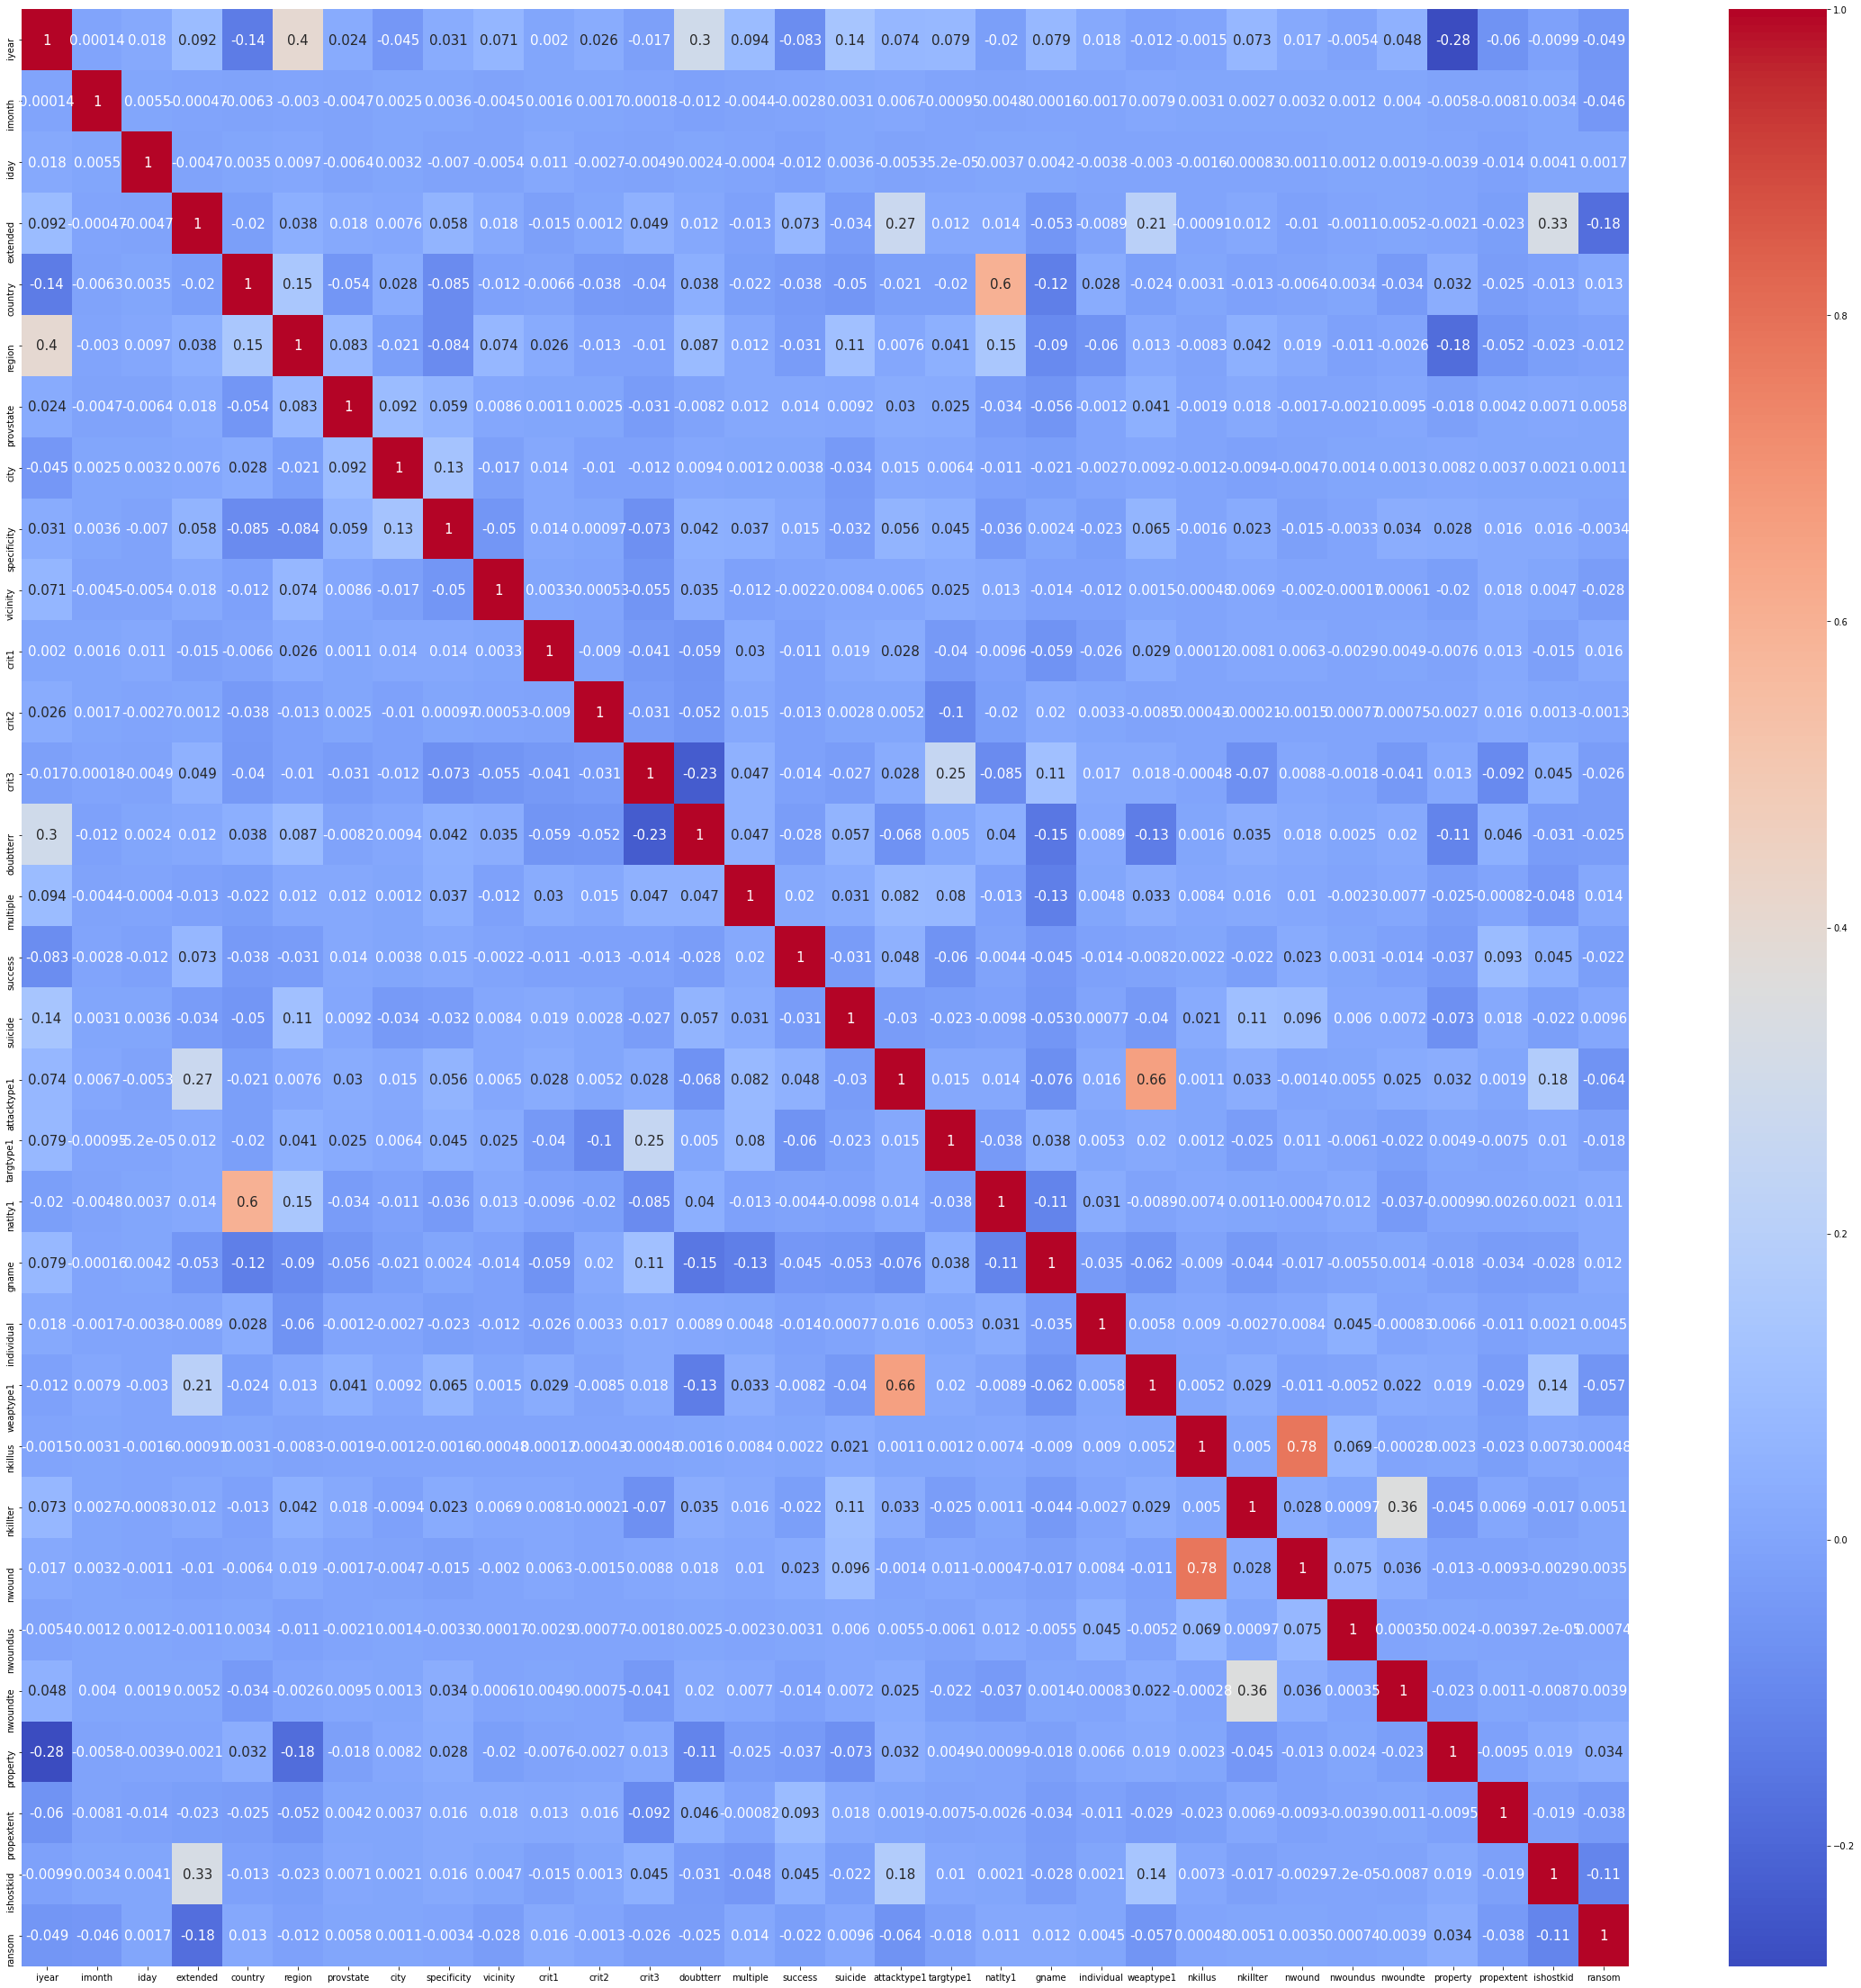

In [7]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})

In [8]:
x=df.drop(['attacktype1'],axis=1)
y=df['attacktype1']

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [10]:
print(model.feature_importances_)

[0.0633096  0.03023294 0.03289791 0.04955349 0.0262557  0.0306621
 0.02852148 0.02987528 0.01261032 0.0049798  0.0027191  0.00128912
 0.01146202 0.01537367 0.00862348 0.01319511 0.01164354 0.04915226
 0.02380879 0.02898672 0.00088149 0.36328551 0.00078811 0.00722077
 0.02526516 0.0006346  0.00261127 0.06891161 0.00776553 0.0435284
 0.00395511]


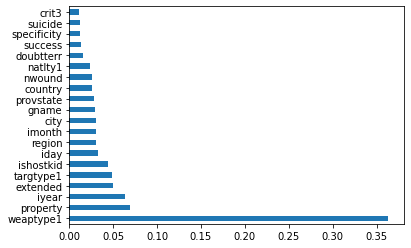

In [11]:
feat_importance=pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [12]:
len(df.iyear.value_counts())

47

In [13]:
X = df[['weaptype1','property','iyear','extended','targtype1','ishostkid',
      'iday', 'provstate','city','imonth','region','gname','country', 'nwound',
      'natlty1', 'doubtterr', 'success','suicide']]

y = df['attacktype1']


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred=rfc.predict(X_test)
y_pred

array([2, 6, 1, ..., 2, 2, 3])

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc=accuracy_score(y_test,y_pred)
acc

0.9208013429098214

In [18]:
pre=confusion_matrix(y_test,y_pred)
pre

array([[ 2899,   542,   263,     0,     1,    41,    15,     1,    46],
       [  254,  7593,   339,     0,    15,    74,   182,     9,    19],
       [   55,   141, 17387,     0,     5,    11,    31,     3,    49],
       [   12,    12,     5,    35,     4,    48,     5,     0,     2],
       [    2,    22,     4,     0,   108,    72,     2,     0,     4],
       [   22,    39,     8,     5,    12,  2122,     2,     0,    10],
       [    4,   219,     9,     0,     2,     9,  1791,     3,    43],
       [   12,    64,     2,     0,     0,     0,    34,   110,     1],
       [   52,     2,     6,     0,     3,     6,    19,     0,  1416]])

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.76      0.81      3808
           2       0.88      0.89      0.89      8485
           3       0.96      0.98      0.97     17682
           4       0.88      0.28      0.43       123
           5       0.72      0.50      0.59       214
           6       0.89      0.96      0.92      2220
           7       0.86      0.86      0.86      2080
           8       0.87      0.49      0.63       223
           9       0.89      0.94      0.92      1504

    accuracy                           0.92     36339
   macro avg       0.87      0.74      0.78     36339
weighted avg       0.92      0.92      0.92     36339



In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
pred=dtc.predict(X_test)
pred

array([2, 6, 1, ..., 2, 1, 3])

In [23]:
acc2=accuracy_score(y_test,pred)
acc2

0.8725886788299073

In [24]:
pre2=confusion_matrix(y_test,pred)
pre2

array([[ 2806,   590,   241,     7,     8,    58,    23,     9,    66],
       [  677,  6933,   409,    13,    26,    62,   306,    45,    14],
       [  357,   444, 16791,     2,    11,     8,    32,     5,    32],
       [    8,    11,     5,    49,     6,    28,     9,     0,     7],
       [    8,    29,     4,     8,   105,    50,     2,     1,     7],
       [   67,    71,     8,    51,    63,  1933,    14,     2,    11],
       [   30,   302,    27,     4,     3,     9,  1646,    18,    41],
       [   13,    54,     2,     0,     0,     1,    21,   132,     0],
       [   69,    11,    33,     3,     8,    10,    56,     0,  1314]])

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72      3808
           2       0.82      0.82      0.82      8485
           3       0.96      0.95      0.95     17682
           4       0.36      0.40      0.38       123
           5       0.46      0.49      0.47       214
           6       0.90      0.87      0.88      2220
           7       0.78      0.79      0.79      2080
           8       0.62      0.59      0.61       223
           9       0.88      0.87      0.88      1504

    accuracy                           0.87     36339
   macro avg       0.72      0.72      0.72     36339
weighted avg       0.87      0.87      0.87     36339



In [26]:
import xgboost as xgb

xg_boost = xgb.XGBRFClassifier() 
xg_boost.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='multi:softprob',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [27]:
xgb_pred = xg_boost.predict(X_test)
xgb_pred

array([2, 6, 1, ..., 2, 1, 3])

In [29]:
acc3=accuracy_score(y_test,xgb_pred)
acc3

0.8784501499766092

In [31]:
pre3=confusion_matrix(y_test,xgb_pred)
pre3

array([[ 1898,   907,   615,     0,     0,    42,    28,     0,   318],
       [  218,  7266,   420,     0,     3,   105,   453,     0,    20],
       [    5,   139, 17388,     0,     1,    17,    42,     2,    88],
       [    9,    13,     6,     0,     1,    84,     2,     0,     8],
       [    2,    71,     5,     0,     1,   125,     4,     0,     6],
       [   11,    28,     4,     0,     3,  2149,     7,     0,    18],
       [    2,   263,     3,     0,     0,     7,  1690,     0,   115],
       [   23,   122,    13,     0,     0,     0,    24,    41,     0],
       [    0,     2,     0,     0,     0,    13,     0,     0,  1489]])

In [32]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           1       0.88      0.50      0.64      3808
           2       0.82      0.86      0.84      8485
           3       0.94      0.98      0.96     17682
           4       0.00      0.00      0.00       123
           5       0.11      0.00      0.01       214
           6       0.85      0.97      0.90      2220
           7       0.75      0.81      0.78      2080
           8       0.95      0.18      0.31       223
           9       0.72      0.99      0.84      1504

    accuracy                           0.88     36339
   macro avg       0.67      0.59      0.59     36339
weighted avg       0.87      0.88      0.87     36339



In [33]:
import pickle

Pkl_filename='Pickle_RFC_Model.pkl'

with open(Pkl_filename, 'wb') as file:
  pickle.dump(rfc,file)

In [35]:
# Load the Model back from file

with open(Pkl_filename, 'rb') as file:  
    Pickle_RFC_Model = pickle.load(file)

Pickle_RFC_Model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = Pickle_RFC_Model.predict([[9,1,2021,1,13,1,15,1565,32086,12,179,1944,58,0,58,0,1,1]])
                                   

In [40]:
def predict(text):
  if text ==1:
    return 'Assassination'
  elif text ==2:
    return 'Armed Assault'
  elif text ==3:
    return 'Bombing/Explosion'
  elif text ==4:
    return 'HiJacking'
  elif text ==5:
    return 'Hostage Taking (Barricade Incident)'
  elif text ==6:
    return 'Hostage Taking (Kidnapping)'
  elif text ==7:
    return 'Facility/Infrastructure Attack'
  elif text ==8:
    return 'Unarmed Assualt'
  else:
    return 'Unknown'

print('The Terrorsit Attack Type Is : ', predict(y_pred))

The Terrorsit Attack Type Is :  Hostage Taking (Kidnapping)
